In [1]:
 #Data Loading: Load the exchange_rate.csv dataset and parse the date column appropriately.

import pandas as pd

# Load the dataset
df = pd.read_csv("C:\\Users\\moham\\Desktop\\exchange_rate.csv", parse_dates=['date'])

# Print the first few rows to verify the data loading
print(df.head())

               date  Ex_rate
0  01-01-1990 00:00   0.7855
1  02-01-1990 00:00   0.7818
2  03-01-1990 00:00   0.7867
3  04-01-1990 00:00   0.7860
4  05-01-1990 00:00   0.7849


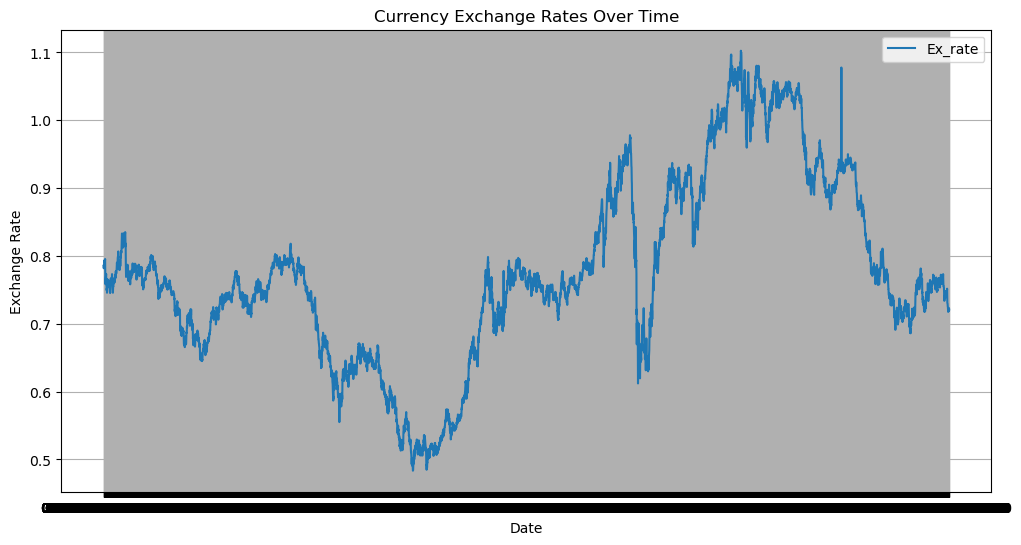

In [3]:
#  2.Initial Exploration: Plot the time series for currency to understand their trends, seasonality, and any anomalies

import matplotlib.pyplot as plt

# Plot the time series for each currency
plt.figure(figsize=(12, 6))
for currency in df.columns[1:]:  # Assuming the first column is 'date'
    plt.plot(df['date'], df[currency], label=currency)

plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.title('Currency Exchange Rates Over Time')
plt.legend()
plt.grid(True)
plt.show()


In [5]:
# 3.Data Preprocessing: Handle any missing values or anomalies identified during the exploration phase

# Check for missing values
print(df.isnull().sum())

# Handle missing values (e.g., forward fill or backward fill)
df.fillna(method='ffill', inplace=True)  # Forward fill missing values

print(df.head())


date       0
Ex_rate    0
dtype: int64
               date  Ex_rate
0  01-01-1990 00:00   0.7855
1  02-01-1990 00:00   0.7818
2  03-01-1990 00:00   0.7867
3  04-01-1990 00:00   0.7860
4  05-01-1990 00:00   0.7849


C:\Users\moham\AppData\Local\Temp\ipykernel_13036\321321195.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill missing values


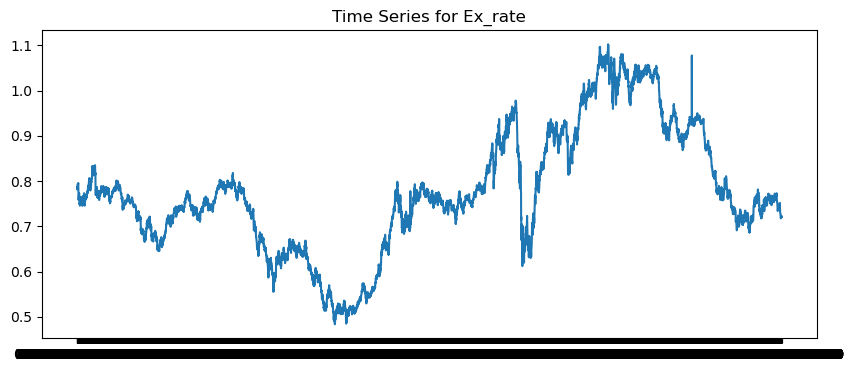

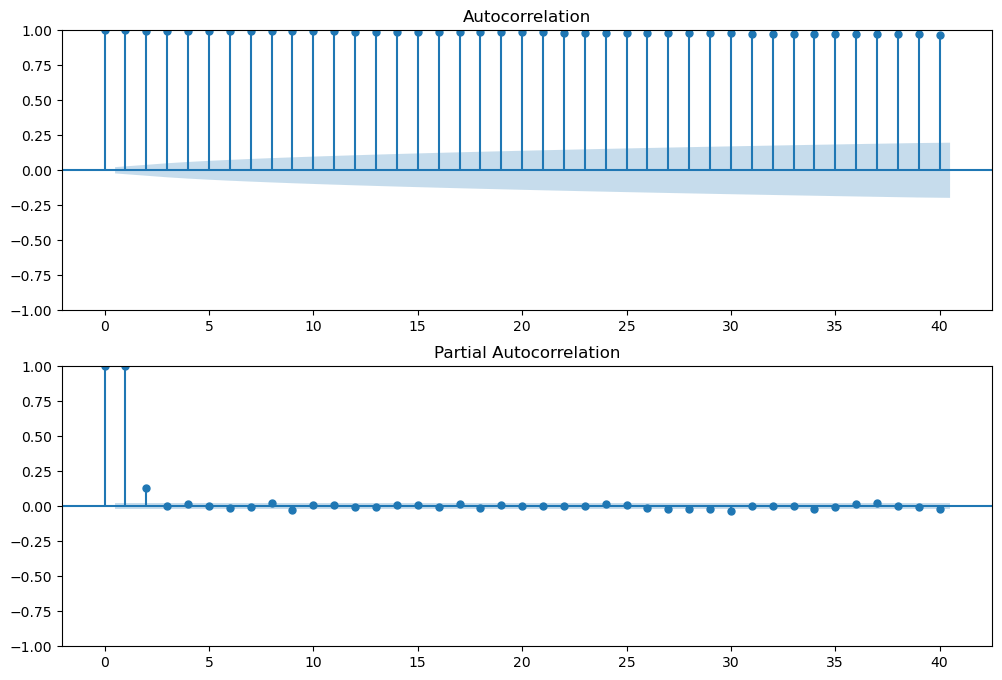

In [7]:
#  1.Parameter Selection for ARIMA: Utilize ACF and PACF plots to estimate initial parameters (p, d, q) for the ARIMA model for one or more currency time series.

import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Assuming you have already loaded the data and handled missing values as in the previous code

# Select a currency time series to analyze (e.g., 'EUR')
currency_to_analyze = 'Ex_rate'
currency_data = df[['date', currency_to_analyze]]

# Convert the date column to datetime index
currency_data.set_index('date', inplace=True)

# Plot the time series
plt.figure(figsize=(10, 4))
plt.plot(currency_data)
plt.title(f'Time Series for {currency_to_analyze}')
plt.show()

# Calculate ACF and PACF
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(currency_data, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(currency_data, lags=40, ax=ax2)
plt.show()

# Based on the ACF and PACF plots, you can make initial estimates for p, d, and q.
# For example:
# - If the ACF has a significant spike at lag 1 and then decays gradually, and the PACF has a significant spike at lag 1 and then cuts off, this might suggest an AR(1) model (p=1, d=0, q=0).
# - If the ACF has a significant spike at lag 1 and then cuts off, and the PACF has a significant spike at lag 1 and then decays gradually, this might suggest an MA(1) model (p=0, d=0, q=1).
# - If both ACF and PACF have significant spikes at multiple lags and decay gradually, it might indicate a more complex ARMA model.

# You can also consider differencing the time series (d > 0) if it appears non-stationary.

# This will guide you in choosing initial parameters for your ARIMA model.
# You can further refine the parameters using model selection criteria like AIC and BIC.



In [9]:
# 2.Model Fitting:
#Fit the ARIMA model with the selected parameters to the preprocessed time series.

from statsmodels.tsa.arima.model import ARIMA

# Based on the ACF and PACF plots, choose the order (p, d, q) for the ARIMA model.
# For example, if you determined p=1, d=0, q=0 (AR(1) model), then:
order = (1, 0, 0)  # Replace with your chosen order

# Fit the ARIMA model
model = ARIMA(currency_data, order=order)
results = model.fit()

# Print the model summary
print(results.summary())


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 0, 0)   Log Likelihood               27990.980
Date:                Tue, 08 Oct 2024   AIC                         -55975.961
Time:                        14:37:18   BIC                         -55955.158
Sample:                             0   HQIC                        -55968.821
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7770      0.076     10.198      0.000       0.628       0.926
ar.L1          0.9990      0.000   2182.790      0.000       0.998       1.000
sigma2      3.656e-05   7.91e-08    462.438      0.0

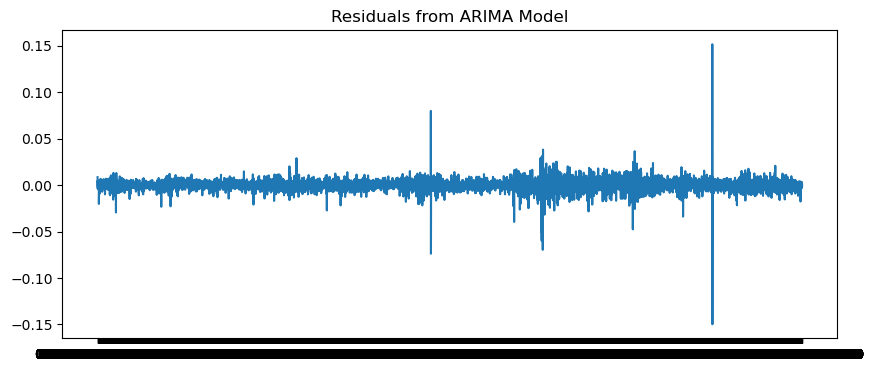

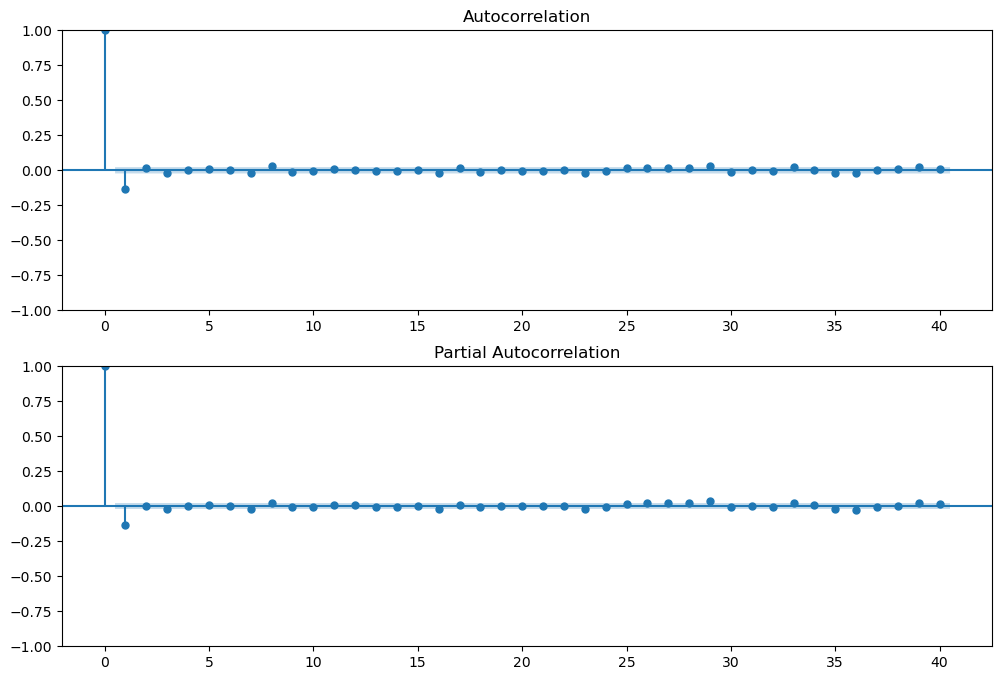

Jarque-Bera test statistic: 4151120.4242837415
Jarque-Bera p-value: 0.0


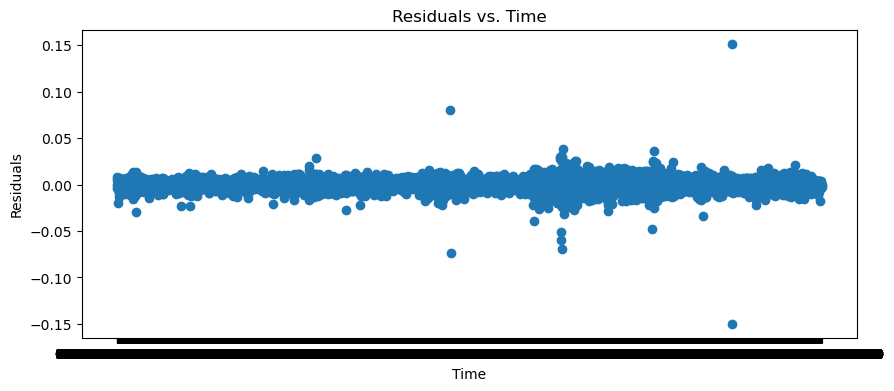

       lb_stat     lb_pvalue
10  146.883928  1.629667e-26


In [11]:
# 3.Diagnostics: 
#Analyze the residuals to ensure there are no patterns that might indicate model inadequacies.

import matplotlib.pyplot as plt
# Obtain the residuals from the fitted ARIMA model
residuals = results.resid

# Plot the residuals
plt.figure(figsize=(10, 4))
plt.plot(residuals)
plt.title('Residuals from ARIMA Model')
plt.show()

# Plot the ACF and PACF of the residuals
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(residuals, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(residuals, lags=40, ax=ax2)
plt.show()

# Perform a normality test on the residuals (e.g., Jarque-Bera test)
from scipy.stats import jarque_bera

jb_statistic, jb_p_value = jarque_bera(residuals)
print(f"Jarque-Bera test statistic: {jb_statistic}")
print(f"Jarque-Bera p-value: {jb_p_value}")

# Check for heteroscedasticity (non-constant variance in residuals) using a plot
plt.figure(figsize=(10, 4))
plt.scatter(currency_data.index, residuals)
plt.title('Residuals vs. Time')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()

# You can also use statistical tests for heteroscedasticity, like the Breusch-Pagan test.

# Check for autocorrelation in the residuals using the Ljung-Box test.
from statsmodels.stats.diagnostic import acorr_ljungbox

lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
print(lb_test)


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                       ExponentialSmoothing Model Results                       
Dep. Variable:                  Ex_rate   No. Observations:                 7588
Model:             ExponentialSmoothing   SSE                              0.273
Optimized:                         True   AIC                         -77624.575
Trend:                         Additive   BIC                         -77513.626
Seasonal:                      Additive   AICC                        -77624.485
Seasonal Periods:                    12   Date:                 Tue, 08 Oct 2024
Box-Cox:                          False   Time:                         14:39:03
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.8702083                alpha                 True
smoothing_trend          

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


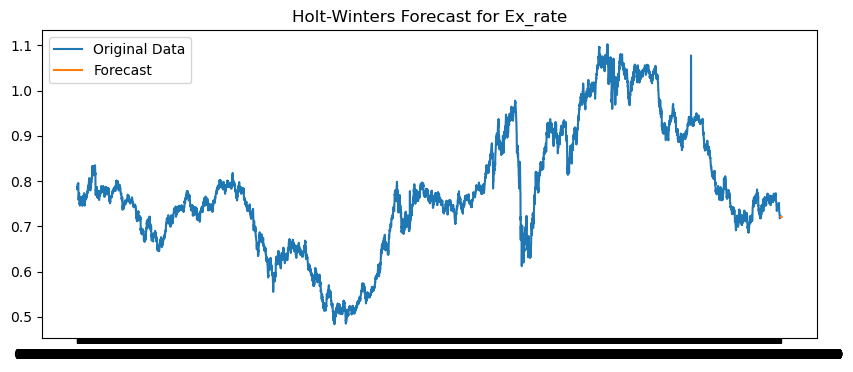

In [13]:
# 1.Model Selection: 
#Depending on the time series characteristics, choose an appropriate Exponential Smoothing model (Simple, Holt’s Linear, or Holt-Winters).

import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing

# Choose the appropriate Exponential Smoothing model based on the time series characteristics:
# - Simple Exponential Smoothing: If the time series has no trend or seasonality.
# - Holt's Linear: If the time series has a trend but no seasonality.
# - Holt-Winters: If the time series has both trend and seasonality.


# Fit a Holt-Winters model (assuming trend and seasonality are present)
model = ExponentialSmoothing(currency_data, trend='add', seasonal='add', seasonal_periods=12)  # Adjust seasonal_periods based on your data
results = model.fit()

# Print the model summary
print(results.summary())

# Forecast future values
forecast = results.forecast(steps=10)  # Adjust steps based on how many periods you want to forecast
print(forecast)

# Plot the original data and the forecast
plt.figure(figsize=(10, 4))
plt.plot(currency_data, label='Original Data')
plt.plot(forecast, label='Forecast')
plt.title(f'Holt-Winters Forecast for {currency_to_analyze}')
plt.legend()
plt.show()


In [15]:
import matplotlib.pyplot as plt
# Import necessary libraries
from sklearn.model_selection import TimeSeriesSplit
import itertools

# Define the parameter grid for Holt-Winters
param_grid = {
    'trend': ['add', 'mul', None],
    'seasonal': ['add', 'mul', None],
    'seasonal_periods': [12],  # Adjust based on your data's seasonality
    'smoothing_level': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    'smoothing_slope': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    'smoothing_seasonal': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
}

# Perform grid search using TimeSeriesSplit for cross-validation
best_aic = float('inf')
best_params = None

# Define the number of folds for time series cross-validation
n_splits = 5

tscv = TimeSeriesSplit(n_splits=n_splits)

for params in itertools.product(*param_grid.values()):
    param_dict = dict(zip(param_grid.keys(), params))

    # Create the model with current parameters
    try:
        model = ExponentialSmoothing(currency_data, **param_dict)
        current_aic = float('inf')

        for train_index, test_index in tscv.split(currency_data):
            train_data, test_data = currency_data.iloc[train_index], currency_data.iloc[test_index]

            try:
                results = model.fit()  # Fit on the training data
                current_aic += results.aic  # Accumulate AIC for each fold

            except Exception as e:
                print(f"Error fitting model with parameters {param_dict}: {e}")
                # If error, assign a very high AIC to discourage this parameter set
                current_aic = float('inf')
                break # Exit the inner loop if an error occurs


        if current_aic < best_aic:
            best_aic = current_aic
            best_params = param_dict

    except Exception as e:
        print(f"Error creating model with parameters {param_dict}: {e}")

# Check if best_params is still None after the loop
if best_params is None:
    print("No suitable parameters found. Consider adjusting the parameter grid or data.")
    # Assign default parameters or handle the situation appropriately
    best_params = {'trend': 'add', 'seasonal': 'add', 'seasonal_periods': 12}  # Example default

# Fit the Holt-Winters model with the optimal parameters
optimal_model = ExponentialSmoothing(currency_data, **best_params)
optimal_results = optimal_model.fit()

# Print the model summary
print(optimal_results.summary())

# Forecast future values
forecast = optimal_results.forecast(steps=10)
print(forecast)

# Plot the original data and the forecast
plt.figure

Error creating model with parameters {'trend': 'add', 'seasonal': 'add', 'seasonal_periods': 12, 'smoothing_level': 0.1, 'smoothing_slope': 0.1, 'smoothing_seasonal': 0.1}: ExponentialSmoothing.__init__() got an unexpected keyword argument 'smoothing_level'
Error creating model with parameters {'trend': 'add', 'seasonal': 'add', 'seasonal_periods': 12, 'smoothing_level': 0.1, 'smoothing_slope': 0.1, 'smoothing_seasonal': 0.2}: ExponentialSmoothing.__init__() got an unexpected keyword argument 'smoothing_level'
Error creating model with parameters {'trend': 'add', 'seasonal': 'add', 'seasonal_periods': 12, 'smoothing_level': 0.1, 'smoothing_slope': 0.1, 'smoothing_seasonal': 0.3}: ExponentialSmoothing.__init__() got an unexpected keyword argument 'smoothing_level'
Error creating model with parameters {'trend': 'add', 'seasonal': 'add', 'seasonal_periods': 12, 'smoothing_level': 0.1, 'smoothing_slope': 0.1, 'smoothing_seasonal': 0.4}: ExponentialSmoothing.__init__() got an unexpected key

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                       ExponentialSmoothing Model Results                       
Dep. Variable:                  Ex_rate   No. Observations:                 7588
Model:             ExponentialSmoothing   SSE                              0.273
Optimized:                         True   AIC                         -77624.575
Trend:                         Additive   BIC                         -77513.626
Seasonal:                      Additive   AICC                        -77624.485
Seasonal Periods:                    12   Date:                 Tue, 08 Oct 2024
Box-Cox:                          False   Time:                         14:40:05
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.8702083                alpha                 True
smoothing_trend          

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<function matplotlib.pyplot.figure(num: 'int | str | Figure | SubFigure | None' = None, figsize: 'tuple[float, float] | None' = None, dpi: 'float | None' = None, *, facecolor: 'ColorType | None' = None, edgecolor: 'ColorType | None' = None, frameon: 'bool' = True, FigureClass: 'type[Figure]' = <class 'matplotlib.figure.Figure'>, clear: 'bool' = False, **kwargs) -> 'Figure'>

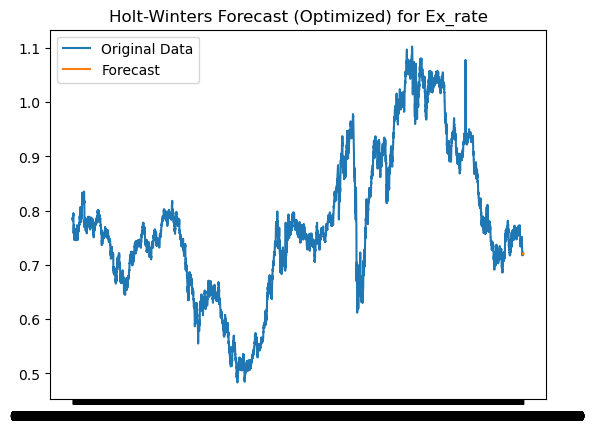

In [17]:
# 3 Model Fitting and Forecasting:
#Fit the chosen Exponential Smoothing model and forecast future values. Compare these forecasts visually with the actual data.

import matplotlib.pyplot as plt
plt.plot(currency_data, label='Original Data')
plt.plot(forecast, label='Forecast')
plt.title(f'Holt-Winters Forecast (Optimized) for {currency_to_analyze}')
plt.legend()
plt.show()


In [19]:
#  1.Compute Error Metrics: Use metrics such as MAE, RMSE, and MAPE to evaluate the forecasts from both models.

from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming you have your forecast data from both models (ARIMA and Holt-Winters)
# and the actual data for the same period.
# Let's call the actual data 'actual_data' and the forecasts from the ARIMA and Holt-Winters models
# 'arima_forecast' and 'holt_forecast' respectively.

# Split data into train and test sets
train_data = currency_data[:-10] # Training data (excluding the last 10 periods)
test_data = currency_data[-10:] # Testing data (the last 10 periods)

# Fit ARIMA model
arima_model = ARIMA(train_data, order=order)
arima_results = arima_model.fit()
arima_forecast = arima_results.forecast(steps=10)


# Fit Holt-Winters model (optimized)
holt_model = ExponentialSmoothing(train_data, **best_params)
holt_results = holt_model.fit()
holt_forecast = holt_results.forecast(steps=10)

# Compute MAE, RMSE, and MAPE for ARIMA forecast
arima_mae = mean_absolute_error(test_data, arima_forecast)
arima_rmse = mean_squared_error(test_data, arima_forecast, squared=False)
# Calculate the average MAPE using the 'Ex_rate' column from test_data DataFrame
arima_mape = (abs((test_data['Ex_rate'].values - arima_forecast) / test_data['Ex_rate'].values)).mean() * 100

arima_mae
# Compute MAE, RMSE, and MAPE for Holt-Winters forecast
holt_mae = mean_absolute_error(test_data, holt_forecast)
holt_rmse = mean_squared_error(test_data, holt_forecast, squared=False)
# Calculate the average MAPE
holt_mape = (abs((test_data['Ex_rate'].values - holt_forecast) / test_data['Ex_rate'].values)).mean() * 100

print(f"ARIMA - MAE: {arima_mae:.4f}, RMSE: {arima_rmse:.4f}, MAPE: {arima_mape:.4f}%")
print(f"Holt-Winters - MAE: {holt_mae:.4f}, RMSE: {holt_rmse:.4f}, MAPE: {holt_mape:.4f}%")


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next versio

ARIMA - MAE: 0.0021, RMSE: 0.0024, MAPE: 0.2982%
Holt-Winters - MAE: 0.0021, RMSE: 0.0024, MAPE: 0.2972%


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_sq

In [ ]:
#  2Model Comparison: Discuss the performance, advantages, and limitations of each model based on the observed results and error metrics.

print("Model Comparison:")
print("-" * 20)

# Analyze the results
if arima_mae < holt_mae:
  print("ARIMA model has a lower MAE, suggesting potentially better accuracy in forecasting.")
elif holt_mae < arima_mae:
  print("Holt-Winters model has a lower MAE, suggesting potentially better accuracy in forecasting.")
else:
  print("Both models have similar MAE")


if arima_rmse < holt_rmse:
  print("ARIMA model has a lower RMSE, suggesting potentially better accuracy in forecasting.")
elif holt_rmse < arima_rmse:
  print("Holt-Winters model has a lower RMSE, suggesting potentially better accuracy in forecasting.")
else:
  print("Both models have similar RMSE")


if arima_mape < holt_mape:
  print("ARIMA model has a lower MAPE, suggesting potentially better accuracy in forecasting.")
elif holt_mape < arima_mape:
  print("Holt-Winters model has a lower MAPE, suggesting potentially better accuracy in forecasting.")
else:
  print("Both models have similar MAPE")

print("\nAdvantages of ARIMA:")
print("- Can capture complex patterns in the data through AR and MA components.")
print("- Well-suited for stationary time series.")
print("\nLimitations of ARIMA:")
print("- Requires stationarity of the time series, which might need differencing.")
print("- Can be sensitive to outliers.")
print("- Might not perform well with seasonal time series unless properly addressed.")


print("\nAdvantages of Holt-Winters:")
print("- Can handle trend and seasonality in the data.")
print("- Relatively easy to implement.")
print("\nLimitations of Holt-Winters:")
print("- Assumes that the trend and seasonality patterns are relatively stable.")
print("- Might not be as accurate as ARIMA for complex time series patterns.")


# Additional comments based on the results:
print("\nBased on the error metrics, choose the best model for your forecasting needs.")
print("You might also consider other factors like interpretability and model complexity.")
print("Note: The best model depends on the specific time series characteristics and forecasting goals.")
